In [30]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import math
import datetime as dt
from io import StringIO
# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [31]:
#from numpy import genfromtxt

#data = genfromtxt(os.path.join('Data','house_prices_data_training_data.csv'), delimiter=',') #read the csv file 
#data = np.nan_to_num(data) #change the nan values to zero.
#X = data[1::, [3,4]]
#y = data[1::, 2]
#m = y.size
#for i in range(100):
 #   print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

#data = pd.read_csv(os.path.join('Data', 'house_prices_data_training_data.csv'))
#data=data.to_numpy() #change the data .csv to numpy
#m=data.shape[0] 

data=pd.read_csv(os.path.join('Data', 'house_prices_data_training_data.csv'))
data= data.replace(np.nan,0)
data
data=data.to_numpy()
#print(m)
#print(data)

11.0
33.0


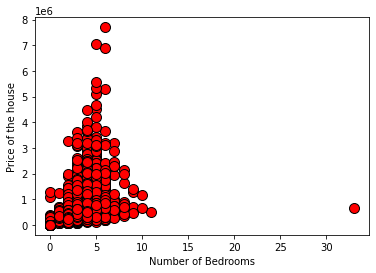

In [153]:
fig = pyplot.figure()  

pyplot.plot(data[:,3],data[:,2] , 'ro', ms=10, mec='k')

pyplot.ylabel('Price of the house')
pyplot.xlabel('Number of Bedrooms')

for i in range(data[:,3].shape[0]):
    if(data[i,3]>10): 
        print(data[i,3])

Text(0.5, 0, 'Number of Bathrooms')

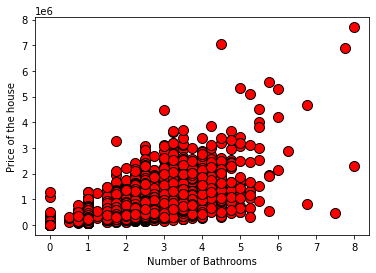

In [154]:
fig = pyplot.figure()  
    
pyplot.plot(data[:,4],data[:,2] , 'ro', ms=10, mec='k')
pyplot.ylabel('Price of the house')
pyplot.xlabel('Number of Bathrooms')

Text(0.5, 0, 'House condition')

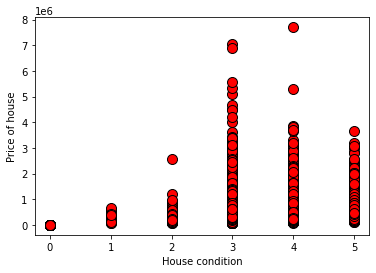

In [155]:
fig = pyplot.figure()
pyplot.plot(data[:,10],data[:,2],'ro',ms=10, mec='k')
pyplot.ylabel('Price of house')
pyplot.xlabel('House condition')

Text(0.5, 0, 'sqft_living')

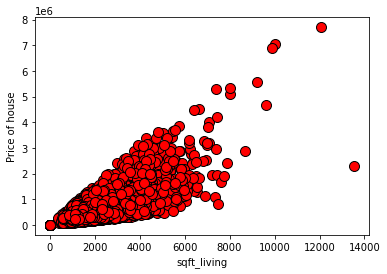

In [156]:
fig = pyplot.figure()
pyplot.plot(data[:,5],data[:,2],'ro',ms=10, mec='k')
pyplot.ylabel('Price of house')
pyplot.xlabel('sqft_living')

Text(0.5, 0, 'Floors')

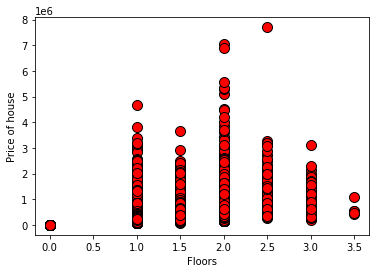

In [157]:
fig = pyplot.figure()
pyplot.plot(data[:,7],data[:,2],'ro',ms=10, mec='k')
pyplot.ylabel('Price of house')
pyplot.xlabel('Floors')


In [158]:
data=pd.read_csv(os.path.join('Data', 'house_prices_data_training_data.csv'))
data= data.replace(np.nan,0)
columns =data.columns[3:]
norm_data = (data[columns]-(data[columns]).mean())/(data[columns]).std()
print(norm_data)
data[columns] = norm_data

       bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0      0.130950  -0.693278    -0.470613 -0.190787 -0.273571   -0.081045   
1      0.130950   0.514779     0.765496 -0.150167  1.137686   -0.081045   
2     -0.528437  -0.693278    -0.835221 -0.079795 -0.273571   -0.081045   
3      0.790337   1.239613     0.223031 -0.207373 -0.273571   -0.081045   
4      0.130950   0.273167    -0.025970 -0.128785 -0.273571   -0.081045   
...         ...        ...          ...       ...       ...         ...   
21602 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   
21603 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   
21604 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   
21605 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   
21606 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
0     -0.281852   0.08

In [159]:
train, validate , test = np.split(data.sample(frac=1),[int(.6*len(data)),int(.8*len(data))]) #splitting the tarining testing and Vaildation sets

In [160]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14506,8.260592e+08,20141117T000000,435000.0,1.449723,-0.693278,0.409781,1.332237,0.432057,-0.081045,-0.281852,...,0.223193,0.216111,0.583839,0.396661,-0.197847,0.445878,0.458710,-0.447467,1.591984,0.071495
9421,6.632900e+09,20141029T000000,329922.0,0.130950,0.031556,-0.257185,-0.174483,-0.273571,-0.081045,-0.281852,...,0.223193,-0.363752,0.160703,0.447058,-0.197847,0.449815,0.457825,-0.449880,-0.191652,-0.143898
6427,4.053200e+09,20140811T000000,725000.0,0.130950,0.756390,1.512497,0.711749,1.137686,-0.081045,-0.281852,...,1.544978,1.986219,-0.591539,0.478385,-0.197847,0.446726,0.434317,-0.444746,0.528061,0.407237
19174,0.000000e+00,0,0.0,-1.847211,-1.659724,-1.519972,-0.334950,-1.684828,-0.081045,-0.281852,...,-2.089930,-1.482786,-0.591539,-2.232126,-0.197847,-2.233472,-2.233416,2.233465,-1.714523,-0.434729
3679,6.072100e+09,20141204T000000,527500.0,0.790337,0.514779,0.498710,-0.118578,-0.273571,-0.081045,-0.281852,...,0.553639,-0.150119,1.665187,0.455230,-0.197847,0.445742,0.446832,-0.446809,0.277726,-0.079146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7137,7.853250e+09,20150216T000000,510000.0,1.449723,1.481224,1.503604,-0.220156,1.137686,-0.081045,-0.281852,...,0.553639,1.304625,0.959960,0.498816,-0.197847,0.447355,0.446477,-0.440359,1.831888,-0.192579
18244,0.000000e+00,0,0.0,-1.847211,-1.659724,-1.519972,-0.334950,-1.684828,-0.081045,-0.281852,...,-2.089930,-1.482786,-0.591539,-2.232126,-0.197847,-2.233472,-2.233416,2.233465,-1.714523,-0.434729
2192,6.294203e+08,20141002T000000,750000.0,0.790337,0.998001,1.316854,-0.104723,1.137686,-0.081045,-0.281852,...,0.884085,1.762412,-0.591539,0.498816,-0.197847,0.447628,0.449369,-0.442750,1.580510,-0.214111
13320,3.343301e+09,20140527T000000,685000.0,0.130950,0.756390,0.978925,-0.138480,1.137686,-0.081045,-0.281852,...,0.884085,1.375837,-0.591539,0.493368,-0.197847,0.445742,0.446922,-0.447182,1.320788,-0.110579


In [161]:
train = train.to_numpy() #change training set to numpy
train

array([[826059152.0, '20141117T000000', 435000.0, ...,
        -0.4474667952448236, 1.5919840344768774, 0.07149547751882014],
       [6632900405.0, '20141029T000000', 329922.0, ...,
        -0.4498799938200203, -0.1916521212231011, -0.14389759675465058],
       [4053200285.0, '20140811T000000', 725000.0, ...,
        -0.44474646230551096, 0.5280607135330306, 0.40723677990240414],
       ...,
       [629420260.0, '20141002T000000', 750000.0, ...,
        -0.4427500889387571, 1.5805103516039536, -0.21411055256032227],
       [3343301385.0, '20140527T000000', 685000.0, ...,
        -0.4471815990495732, 1.3207878938441322, -0.11057885779370509],
       [7625703885.0, '20140917T000000', 870000.0, ...,
        -0.4516569854981198, 0.6219363006751347, -0.12236614752045467]],
      dtype=object)

In [162]:
validate = validate.to_numpy() #change cv set to numpy
validate

array([[2652501470.0, '20140521T000000', 1220000.0, ...,
        -0.4508013969123685, 0.18385022734531545, -0.2932818485583236],
       [3578401760.0, '20140820T000000', 393000.0, ...,
        -0.44380312104429787, 0.27772581448741956, 0.10116015666447327],
       [2607720150.0, '20140605T000000', 492000.0, ...,
        -0.43869152769865377, 0.7575343709915074, 0.007215457542279081],
       ...,
       [6067910030.0, '20150316T000000', 664000.0, ...,
        -0.4469622173609189, 0.7783956125786416, 0.005761691809313299],
       [7893808220.0, '20140709T000000', 250000.0, ...,
        -0.450318757197329, -0.23337460439736962, -0.08936173628555584],
       [0.0, 0, 0.0, ..., 2.2334651927855695, -1.7145227570839014,
        -0.4347293252793187]], dtype=object)

In [163]:
test = test.to_numpy() #change testing set to numpy
test

array([[2595650220.0, '20150421T000000', 313100.0, ...,
        -0.44895859072767275, 0.35074016004238945, 0.010673062528792292],
       [1223049150.0, '20150414T000000', 325000.0, ...,
        -0.4480152494664593, -0.04562343011316134, -0.013333717548021028],
       [7227802030.0, '20140623T000000', 350000.0, ...,
        -0.44700609369864963, 0.5280607135330306, -0.146608673391803],
       ...,
       [5417600130.0, '20150512T000000', 301000.0, ...,
        -0.4388231567118463, -0.36897267471374223, -0.08111063347683113],
       [9201000460.0, '20141006T000000', 705000.0, ...,
        -0.44463677146118397, 1.1643285819406253, 0.05369667003142827],
       [7853301220.0, '20140910T000000', 425000.0, ...,
        -0.44055627205221476, 0.8305487165464773, -0.20833478059421498]],
      dtype=object)

In [164]:
train_x = train[:,[3,4]] #bedrooms and bathrooms
train_x


array([[1.4497233687483166, -0.6932783362867968],
       [0.13094964688557056, 0.03155585517510515],
       [0.13094964688557056, 0.7563900466370072],
       ...,
       [0.7903365078169436, 0.9980014437909744],
       [0.13094964688557056, 0.7563900466370072],
       [0.7903365078169436, 1.2396128409449418]], dtype=object)

In [165]:
train_y =train[:,2] #price
train_y

array([435000.0, 329922.0, 725000.0, ..., 750000.0, 685000.0, 870000.0],
      dtype=object)

In [166]:
train_m =train_y.size
train_m

12964

In [167]:
train_x = np.concatenate([np.ones((train_m,1)), train_x], axis =1) #hanhot fe awel col.= one
train_x

array([[1.0, 1.4497233687483166, -0.6932783362867968],
       [1.0, 0.13094964688557056, 0.03155585517510515],
       [1.0, 0.13094964688557056, 0.7563900466370072],
       ...,
       [1.0, 0.7903365078169436, 0.9980014437909744],
       [1.0, 0.13094964688557056, 0.7563900466370072],
       [1.0, 0.7903365078169436, 1.2396128409449418]], dtype=object)

In [168]:
def computeCostMulti(train_x, train_y, theta):
    
    #intialize some useful values 
    
    train_m = train_y.shape[0] #number of training examples 
    
    #you need to return the following variable correctly 
    
    j=0
    #==============your code here =============
    
    j=0
    h=np.dot(train_x,theta)
    j=(1/(2*train_m))*np.sum(np.square(h-train_y))
    
    #=====================================================

    return j

In [169]:
def gradientDescentMulti(train_x,train_y, theta, alpha, num_iters):
    
    #intialize some useful values
    
    train_m = train_y.shape[0] #number of trainig examples 
    
    #Make a copy of theta, which will be updated by Gradient Descent 
    
    theta = theta.copy()
    j_history= []
    for i in range(num_iters):
        #==================YOUR CODE IS HERE =================
        sumofh0x=np.dot(train_x,theta)
        
        theta =theta-((alpha/train_m)*(np.dot(train_x.T,sumofh0x- train_y)))
        #=======================================
        
        #save the cost j in every iteration
        
        j_history.append(computeCostMulti(train_x, train_y, theta))
        
    return theta, j_history

Text(0, 0.5, 'Cost')

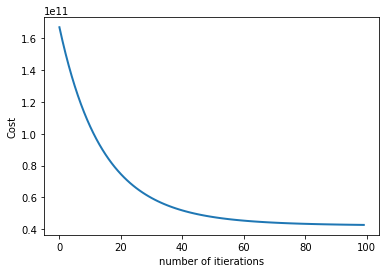

In [170]:
# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(train_x, train_y, theta, alpha, num_iters) 
#print(theta)
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost')

In [171]:
def computeCostMulti2(train_x, train_y, theta):
  #  initialize some useful values

 train_m = train_y.shape[0]  #number of training examples 

#you need to return the following variable correctly

 j=0
#===================your code here==============
 j=0
 h=np.dot(np.square(train_x),theta)
 j=(1/(2*train_m))*np.sum(np.square(h-train_y))

#==========================
 return j

In [177]:
def gradientDescentMulti2(train_x, train_y, theta, alpha, num_iters):
    train_m = train_y.shape[0]
    theta=theta.copy()
    j_history = []
    for i in range(num_iters):
        sumofh0x=np.dot(np.square(train_x),theta)
        theta = theta-((alpha/train_m)*(np.dot(np.square(train_x).T,sumofh0x -train_y)))
        j_history.append(computeCostMulti2(train_x, train_y, theta))
     
    return theta, j_history

Text(0, 0.5, 'cost')

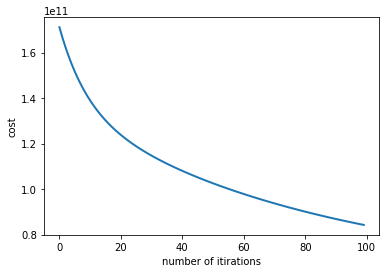

In [178]:
alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_history = gradientDescentMulti2(train_x, train_y, theta, alpha, num_iters)

#plot the convergence graph
#print(theta)
#print(j_history)
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itirations')
pyplot.ylabel('cost')


In [179]:
def computeCostMulti3(train_x, train_y, theta):
  #  initialize some useful values

 train_m = train_y.shape[0]  #number of training examples 

#you need to return the following variable correctly

 j=0
#===================your code here==============
 j=0

 j =np.dot((np.dot(np.power(train_x,3),theta)-train_y),(np.dot(np.power(train_x,3),theta)-train_y))/(2*train_m)
#==========================
 return j

In [175]:
def gradientDescentMulti3(train_x, train_y, theta, alpha, num_iters):
    train_m = train_y.shape[0]
    theta=theta.copy()
    j_history = []
    for i in range(num_iters):
        sumofh0x=np.dot(np.power(train_x,3),theta)
        theta = theta-((alpha/train_m)*(np.dot(np.power(train_x,3).T,sumofh0x -train_y)))
        j_history.append(computeCostMulti3(train_x, train_y, theta))
     
    return theta, j_history

Text(0, 0.5, 'cost')

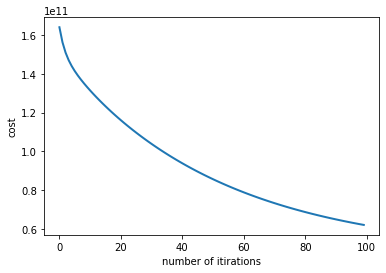

In [176]:
alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_historyy = gradientDescentMulti3(train_x, train_y, theta, alpha, num_iters)

#plot the convergence graph
#print(theta)
#print(j_historyyy)
pyplot.plot(np.arange(len(j_historyy)), j_historyy, lw=2)
pyplot.xlabel('number of itirations')
pyplot.ylabel('cost')

In [33]:
validate_x = validate[:,[3,4]]
validate_x

array([[0.7903365078169436, 0.7563900466370072],
       [0.7903365078169436, 1.7228356352528764],
       [0.13094964688557056, 0.5147786494830398],
       ...,
       [0.13094964688557056, 0.03155585517510515],
       [-0.5284372140458025, -0.6932783362867968],
       [-1.8472109359085485, -1.659723924902666]], dtype=object)

In [34]:
validate_y =validate[:,2]
validate_y

array([525000.0, 1200000.0, 438000.0, ..., 450000.0, 230000.0, 0.0],
      dtype=object)

In [35]:
validate_m =validate_y.size
validate_m

4321

In [36]:

validate_x = np.concatenate([np.ones((validate_m,1)), validate_x], axis =1)
validate_x

array([[1.0, 0.7903365078169436, 0.7563900466370072],
       [1.0, 0.7903365078169436, 1.7228356352528764],
       [1.0, 0.13094964688557056, 0.5147786494830398],
       ...,
       [1.0, 0.13094964688557056, 0.03155585517510515],
       [1.0, -0.5284372140458025, -0.6932783362867968],
       [1.0, -1.8472109359085485, -1.659723924902666]], dtype=object)

Text(0, 0.5, 'Cost')

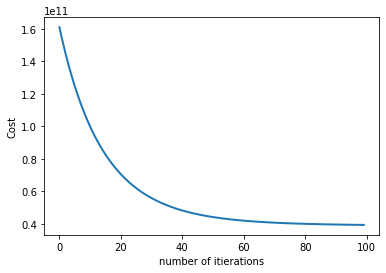

In [37]:

# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(validate_x, validate_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost')

Text(0, 0.5, 'cost j')

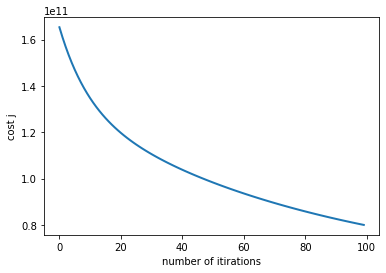

In [38]:

alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_historyy = gradientDescentMulti2(validate_x, validate_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_historyy)), j_historyy, lw=2)
pyplot.xlabel('number of itirations')
pyplot.ylabel('cost j')

Text(0, 0.5, 'cost j')

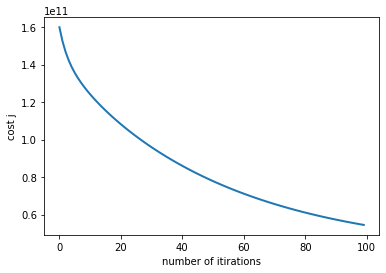

In [39]:

alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_historyy = gradientDescentMulti3(validate_x, validate_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_historyy)), j_historyy, lw=2)
pyplot.xlabel('number of itirations')
pyplot.ylabel('cost j')

In [40]:
test_x = test[:,[3,4]]
test_x

array([[0.7903365078169436, 0.7563900466370072],
       [0.13094964688557056, 0.03155585517510515],
       [0.13094964688557056, -0.6932783362867968],
       ...,
       [0.13094964688557056, 0.03155585517510515],
       [0.7903365078169436, 0.9980014437909744],
       [0.13094964688557056, 0.03155585517510515]], dtype=object)

In [41]:
test_y =test[:,2]
test_y

array([650000.0, 350000.0, 790000.0, ..., 404000.0, 625000.0, 352500.0],
      dtype=object)

In [42]:
test_m =test_y.size
test_m

4322

In [43]:
test_x = np.concatenate([np.ones((test_m,1)), test_x], axis =1)
test_x

array([[1.0, 0.7903365078169436, 0.7563900466370072],
       [1.0, 0.13094964688557056, 0.03155585517510515],
       [1.0, 0.13094964688557056, -0.6932783362867968],
       ...,
       [1.0, 0.13094964688557056, 0.03155585517510515],
       [1.0, 0.7903365078169436, 0.9980014437909744],
       [1.0, 0.13094964688557056, 0.03155585517510515]], dtype=object)

Text(0, 0.5, 'Cost')

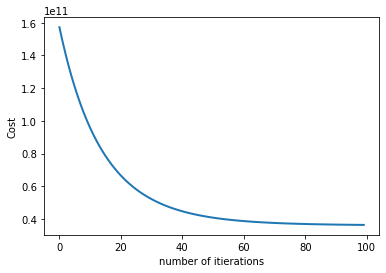

In [44]:

# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(test_x, test_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost')

Text(0, 0.5, 'cost')

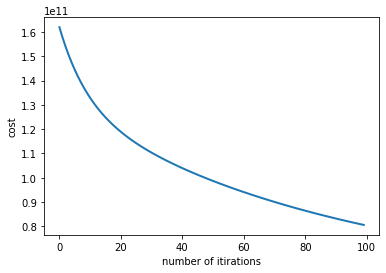

In [45]:
alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_historyy = gradientDescentMulti2(test_x, test_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_historyy)), j_historyy, lw=2)
pyplot.xlabel('number of itirations')
pyplot.ylabel('cost')

Text(0, 0.5, 'cost')

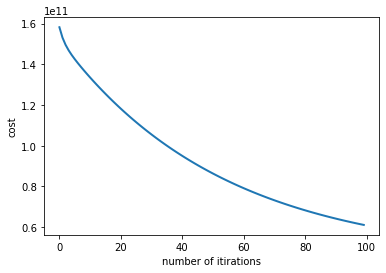

In [46]:
alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_historyy = gradientDescentMulti3(test_x, test_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_historyy)), j_historyy, lw=2)
pyplot.xlabel('number of itirations')
pyplot.ylabel('cost')